<a href="https://colab.research.google.com/github/Kamui964/KNN-Naive_Bayes/blob/master/KNN%26NaiveBayes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
#importing libraries of use 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns
from collections import Counter

In [5]:
#reading training and testing data
df_train=pd.read_csv('/content/train[1].csv')
df_test=pd.read_csv('/content/test[1].csv')

In [6]:
print(df_train.columns) #to know column names
df_train.head() #to know top five row of data

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
#dropped PassengerId,Name,Ticket and Cabin columns
df_train.drop(['PassengerId', 'Name','Ticket','Cabin' ],axis=1,inplace=True) 

In [8]:
df_train.columns #to know columns present in dataset

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')

In [9]:
df_train.shape #to know total rows and columns in dataset

(891, 8)

In [10]:
df_train.isnull().sum() #to know any null elements

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [11]:
#to handle null values
df_train['Age'].fillna(df_train['Age'].mean(), inplace=True)
df_train['Embarked'].fillna(df_train['Embarked'].mode()[0], inplace=True)
df_train.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [12]:
df_train.groupby(['Sex'])['Survived'].sum() #to know count of how many of each gender survived

Sex
female    233
male      109
Name: Survived, dtype: int64

In [13]:
df_train.describe() #to know statistics of dataset

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [14]:
df_train.groupby(['Sex','Survived'])['Age'].max() #to know maximum age of person of each sex who survived

Sex     Survived
female  0           57.0
        1           63.0
male    0           74.0
        1           80.0
Name: Age, dtype: float64

In [15]:
df_train.groupby(['Sex','Survived'])['Age'].min() #to know minimum age of person of each sex who survived

Sex     Survived
female  0           2.00
        1           0.75
male    0           1.00
        1           0.42
Name: Age, dtype: float64

In [16]:
df_train.groupby(['Sex','Survived'])['Age'].mean() #to know average age of person of each sex who survived

Sex     Survived
female  0           26.023272
        1           28.979263
male    0           31.175224
        1           27.631705
Name: Age, dtype: float64

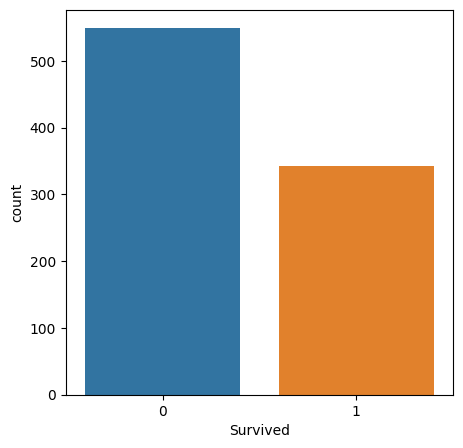

In [17]:
rcParams['figure.figsize']=5,5
sns.countplot(x=df_train['Survived']) #countplot of total survived
plt.show()

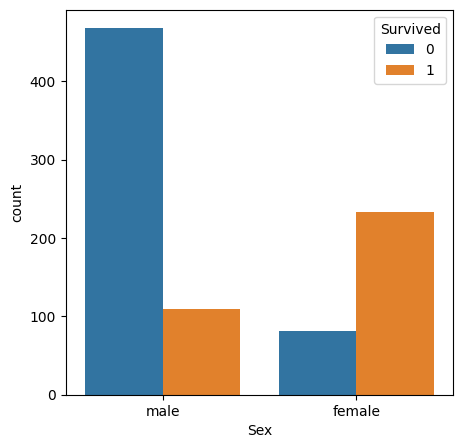

In [18]:
#count plot of how many of each sex survived
sns.countplot(data=df_train,x='Sex',hue='Survived') #countplot of each sex
plt.show()

In [19]:
#to know how many of each sex in eaxh class survived
pd.crosstab([df_train.Sex,df_train.Survived],df_train.Pclass,margins=True).style.background_gradient(cmap='Blues')


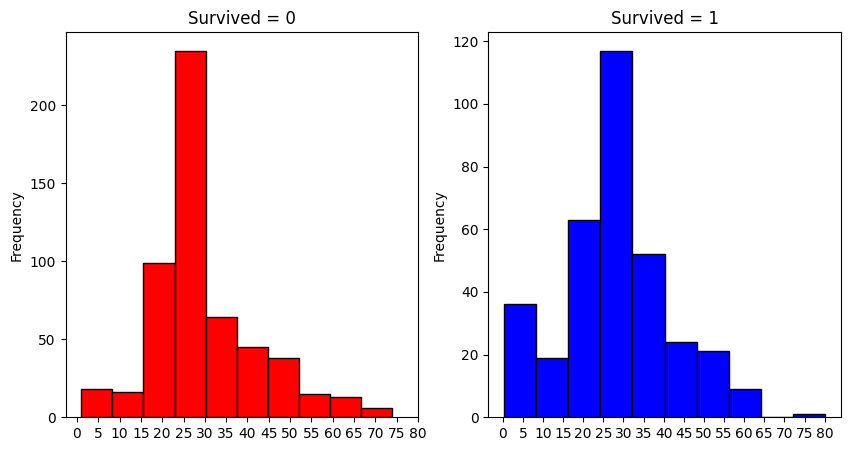

In [20]:
#age distribution of people who survived and died
f,ax=plt.subplots(1,2,figsize=(10,5))
df_train[df_train['Survived']==0].Age.plot.hist(ax=ax[0],bins=10,edgecolor='black',color='red')
ax[0].set_title('Survived = 0')
x1=list(range(0,85,5))
ax[0].set_xticks(x1)
df_train[df_train['Survived']==1].Age.plot.hist(ax=ax[1],bins=10,edgecolor='black',color='blue')
x2=list(range(0,85,5))
ax[1].set_xticks(x2)
ax[1].set_title('Survived = 1')
plt.show()

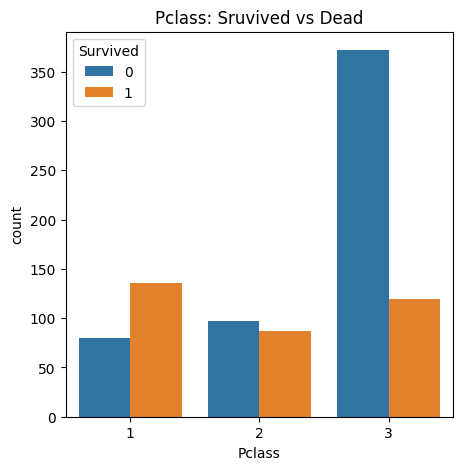

In [21]:
#count of survived or dies in each class
rcParams['figure.figsize']=5,5
sns.countplot(data=df_train,x='Pclass', hue='Survived')
plt.title('Pclass: Sruvived vs Dead')
plt.show()

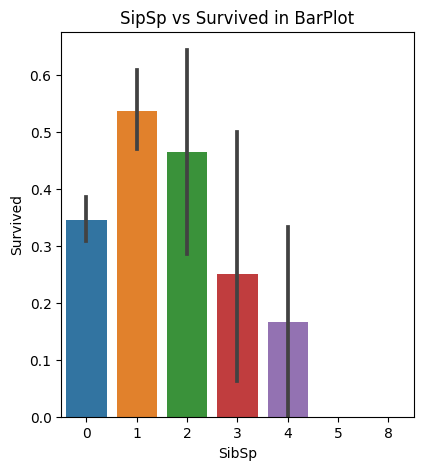

In [22]:
#distribution of sibling/spouse who survived
rcParams['figure.figsize'] = 10,5
plt.subplot(1,2,1)
sns.barplot(x='SibSp',y='Survived', data=df_train)
plt.title('SipSp vs Survived in BarPlot')
plt.show()

In [23]:
pd.crosstab(df_train.SibSp,df_train.Pclass).style.background_gradient('Blues')

Pclass,1,2,3
SibSp,,,
0,137,120,351
1,71,55,83
2,5,8,15
3,3,1,12
4,0,0,18
5,0,0,5
8,0,0,7


<ipython-input-24-2d4f1f37dc9f>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr=df_train.corr('pearson')


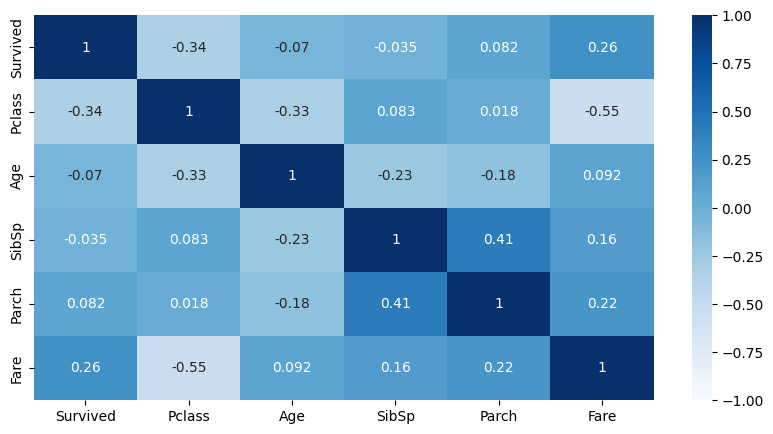

In [24]:
#plotting correlation matrix heatmap between features
corr=df_train.corr('pearson')
sns.heatmap(corr,cmap='Blues',vmin=-1,vmax=1,annot=True)
plt.show()

In [25]:
#Normalizing data using min-max
df_train['Age'] = (df_train['Age'] - df_train['Age'].min()) / (df_train['Age'].max() - df_train['Age'].min())
df_train['Fare'] = (df_train['Fare'] - df_train['Fare'].min()) / (df_train['Fare'].max() - df_train['Fare'].min())

In [26]:
# Convert categorical variables to numerical using one-hot encoding
data = pd.get_dummies(df_train, columns=['Sex', 'Embarked'], drop_first=True)
x_train = df_train.drop('Survived', axis=1)
y_train = df_train['Survived']
df_train.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')

K-Nearest Neighbors Predictions: [0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 

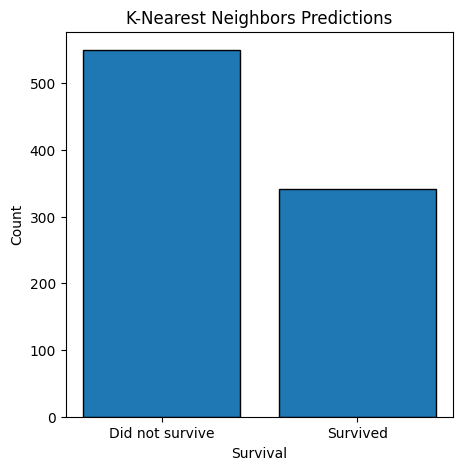

In [29]:
#KNN implementation
class KNN:
    def __init__(self, k):
        self.k = k
        self.x_train = None
        self.y_train = None

    def preprocess(self, data):
        # Filling missing values
        df_train['Age'].fillna(df_train['Age'].mean(), inplace=True)
        df_train['Fare'].fillna(df_train['Fare'].median(), inplace=True)
        df_train['Embarked'].fillna(df_train['Embarked'].mode()[0], inplace=True)
        # Convert categorical variables to numerical using one-hot encoding
        data = pd.get_dummies(df_train, columns=['Sex', 'Embarked'], drop_first=True)
        return data

    def fit(self, x_train, y_train):
        self.x_train = self.preprocess(x_train)
        self.y_train = y_train

    def predict(self, x_test):
        x_test = self.preprocess(x_test)
        predictions = []
        for i in range(len(x_test)):
            distances = np.sqrt(np.sum((x_test.iloc[i].values - self.x_train.values) ** 2, axis=1))
            nearest_indices = np.argsort(distances)[:self.k]
            nearest_labels = self.y_train.iloc[nearest_indices]
            prediction = nearest_labels.mode().values[0]
            predictions.append(prediction)
        return predictions
    
# Apply KNN algorithm
knn = KNN(k=5)
knn.fit(x_train, y_train)
knn_preds = knn.predict(x_train)
print("K-Nearest Neighbors Predictions:", knn_preds)

#Plotting KNN Predictions
survived_count = knn_preds.count(1)
not_survived_count = knn_preds.count(0)
rcParams['figure.figsize']=5,5
plt.bar(['Did not survive', 'Survived'], [not_survived_count, survived_count], edgecolor='black')
plt.title('K-Nearest Neighbors Predictions')
plt.xlabel('Survival')
plt.ylabel('Count')
plt.show()
    




Naive Bayes Predictions: [0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0,

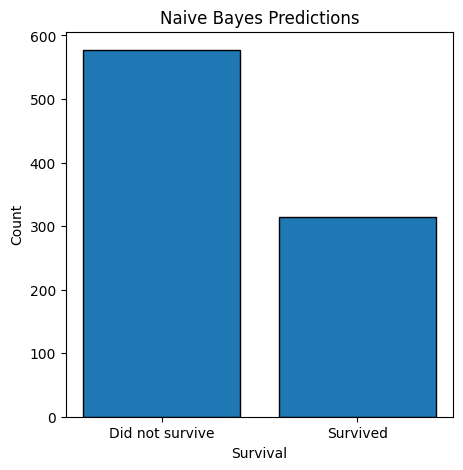

In [31]:
# Implementation of Naive Bayes algorithm
class NaiveBayes:
    def __init__(self):
        self.class_probs = None
        self.feature_probs = None

    def fit(self, x_train, y_train):
        # Calculate class probabilities
        class_counts = y_train.value_counts()
        self.class_probs = class_counts / len(y_train)

        # Calculate feature probabilities for each class
        self.feature_probs = {}
        for feature in x_train.columns:
            self.feature_probs[feature] = {}
            for class_value in y_train.unique():
                subset = x_train[y_train == class_value]
                count = subset[feature].value_counts()
                self.feature_probs[feature][class_value] = (count + 1) / (len(subset) + len(x_train[feature].unique()))

    def predict(self, x_test):
      predictions = []
      for i in range(len(x_test)):
          posterior_probs = []
          for class_value in self.class_probs.index:
              posterior_prob = self.class_probs[class_value]
              for feature, value in x_test.iloc[i].items():
                  if value in self.feature_probs[feature][class_value]:
                      posterior_prob *= self.feature_probs[feature][class_value][value]
                  else:
                      posterior_prob *= 1 / (len(x_train[y_train == class_value]) + len(x_train[feature].unique()))
              posterior_probs.append(posterior_prob)
          predictions.append(self.class_probs.index[np.argmax(posterior_probs)])
      return predictions

# Apply Naive Bayes algorithm
nb = NaiveBayes()
nb.fit(x_train, y_train)
nb_preds = nb.predict(x_train)
print("Naive Bayes Predictions:", nb_preds)

# Plotting Naive Bayes Predictions
survived_count = nb_preds.count(1)
not_survived_count = nb_preds.count(0)
plt.bar(['Did not survive', 'Survived'], [not_survived_count, survived_count], edgecolor='black')
plt.title('Naive Bayes Predictions')
plt.xlabel('Survival')
plt.ylabel('Count')
plt.show()




In [32]:
df_test.columns


Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [33]:
df_test.shape

(418, 11)

In [43]:
from sklearn.metrics import accuracy_score
# Load the "gender_submission" dataset
df_g = pd.read_csv('/content/gender_submission[2].csv')

# Merge the "gender_submission" dataset with the test dataset based on "PassengerId"
merged_data = pd.merge(df_test, df_g, on='PassengerId', how='left')

# Extract the ground truth labels from the merged dataset
y_true = merged_data['Survived']

# Calculate accuracy score for Naive Bayes predictions
accuracy_nb = accuracy_score(y_true, nb_preds[:len(y_true)])

# Calculate accuracy score for KNN predictions 
accuracy_knn = accuracy_score(y_true, knn_preds[:len(y_true)])

# Print the accuracies
print("Naive Bayes Accuracy:", accuracy_nb)
print("KNN Accuracy:", accuracy_knn)

Naive Bayes Accuracy: 0.5023923444976076
KNN Accuracy: 0.507177033492823
